In [ ]:
!nvidia-smi

Sat Dec 18 20:03:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os . chdir ( "/content/gdrive/My Drive/Colab Notebooks/5) Deep Learning/Projects/Common/Sign Board Text Detection")

In [ ]:
train_model = False

In [ ]:
# # All files from git are cloned and kept in folder named -> 'Object Detection Files' <-
# # Move all files to main folder and we do not need to execute this cell

# if train_model :
#     %%shell
#     git clone https://github.com/pytorch/vision.git
#     cd vision
#     git checkout v0.3.0

#     cp references/detection/utils.py ../
#     cp references/detection/transforms.py ../
#     cp references/detection/coco_eval.py ../
#     cp references/detection/engine.py ../
#     cp references/detection/coco_utils.py ../

In [ ]:
# Mandatory Packages

import numpy as np

my_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
if torch.cuda.is_available() : print(torch.cuda.get_device_name(0))

import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from PIL import Image

In [ ]:
# # Optional Packages - Import if any work has to be done related to PyTorch and it's packages

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.autograd import Variable
# import torch.nn.functional as F
# import torchvision
# from torchvision import transforms, datasets
# import torchvision.transforms as transforms
# from torchvision import models

# from torch.utils.data import Dataset
# import math

# # Import only when we need to train model
# # Remove all files from folder named -> 'Object Detection Files' <- and paste in main folder
# if train_model :
#     from engine import train_one_epoch, evaluate
#     import utils
#     import transforms as T

Tesla T4


# Dataset Class

### Trial Codes

In [ ]:
# transform = transforms.Compose([
#     # transforms.Resize((500,500)),
#     transforms.ToTensor(),
#     # transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225)),
#     ])

In [ ]:
# def im_convert(tensor):
#     image = tensor.to("cpu").clone().detach()
#     image = image.numpy().squeeze()
#     image = image.transpose(1,2,0)
#     image = image * np.array((0.229,0.224,0.225)) + np.array((0.485,0.456,0.406))
#     image = image.clip(0, 1)
#     return image

In [ ]:
# subset = False


# images_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Images/Trial'
# annotations_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Annotations/Trial'

# # images_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Images/1'
# # annotations_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Annotations/1'

In [ ]:
# class data_reader (Dataset) :

#     def __init__ (self, images_path, annotations_path, transforms=None) :
#         self.images_path = images_path
#         self.annotations_path = annotations_path
#         self.transforms = transforms
#         self.all_image_file_names = list(sorted(os.listdir(images_path)))
#         self.all_annotation_file_names = list(sorted(os.listdir(annotations_path)))

#     def __getitem__ (self, index) :
#         current_image_path = os.path.join(self.images_path, self.all_image_file_names[index])
#         current_annotation_path = os.path.join(self.annotations_path, self.all_annotation_file_names[index])
#         image = Image.open(current_image_path).convert('RGB')
#         if self.transforms is not None :
#             image = self.transforms(image)
#         target = {}
#         boxes = []
#         area = []
#         with open(current_annotation_path, "r") as file :
#             for line in file.readlines():
#                 line = list(map(float,line.split()[:-1]))
#                 # line = list(map(int,[round(elem,0) for elem in list(map(float,line.split()[:-1]))]))
#                 left = min(line[0],line[3]) if min(line[0],line[3]) >= 0 else 0
#                 right = max(line[1],line[2]) if max(line[1],line[2]) >= 0 else 0
#                 top = min(line[4],line[5]) if min(line[4],line[5]) >= 0 else 0
#                 down = max(line[6],line[7]) if max(line[6],line[7]) >= 0 else 0
#                 boxes.append([left,top,right,down])
#                 # boxes.append([left,down,right,top])
#                 # boxes.append([(right-left)/2 , (down-top)/2 , (right-left) , (down-top) ])

#                 area.append((right - left) * (down - top))
#         target['boxes'] = torch.tensor(boxes)
#         target['labels'] = torch.ones((len(boxes),), dtype=torch.int64)
#         target['image_id'] = torch.tensor([index])
#         target['area'] = torch.tensor(area)
#         target['iscrowd'] = torch.zeros((len(boxes),), dtype=torch.int64)
#         return list([image, target])

#     def __len__ (self) :
#         return len(self.all_image_file_names)

#     def check_order (self) :
#         wrong_names = []
#         for image_file_name,annotation_file_name in zip(self.all_image_file_names,self.all_annotation_file_names) :
#             image_file_name, annotation_file_name = int(image_file_name[:-4]), int(annotation_file_name[:-4])
#             if image_file_name != annotation_file_name : wrong_names.append([image_file_name,annotation_file_name])
#         return wrong_names

In [ ]:
# %%time
# dataset = data_reader(images_path=images_path, annotations_path=annotations_path, transforms=transform)

# if subset :
#     torch.manual_seed(1)
#     indices = torch.randperm(len(dataset)).tolist()
#     dataset = torch.utils.data.Subset(dataset, indices[:4000])

# data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
# def get_boxes (boxes) :
#     to_ret = []
#     for i in boxes :
#         to_ret.append([(i[0],i[1]),(i[2],i[3])])
#     return to_ret

# def object_detection_api(img_numpy, boxes, threshold=0.3, rect_th=3, text_size=5, text_th=2):
#     boxes = get_boxes(boxes)
#     # img = cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB)
#     img = cv2.cvtColor(cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
#     for i in range(len(boxes)):
#         cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0,255,255), thickness=rect_th)
#     plt.figure(figsize=(10,10))
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

In [ ]:
# transform = transforms.Compose([
#     transforms.Resize((500,500)),
#     transforms.ToTensor(),
#     # transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225)),
#     ])

In [ ]:
# class data_reader (Dataset) :

#     def __init__ (self, images_path, annotations_path, transforms=None) :
#         self.images_path = images_path
#         self.annotations_path = annotations_path
#         self.transforms = transforms
#         self.all_image_file_names = list(sorted(os.listdir(images_path)))
#         self.all_annotation_file_names = list(sorted(os.listdir(annotations_path)))

#     def __getitem__ (self, index) :
#         current_image_path = os.path.join(self.images_path, self.all_image_file_names[index])
#         current_annotation_path = os.path.join(self.annotations_path, self.all_annotation_file_names[index])
#         image = Image.open(current_image_path).convert('RGB')
#         X, Y = image.size[0], image.size[1]
#         if self.transforms is not None :
#             image = self.transforms(image)
#         target = {}
#         boxes = []
#         area = []
#         with open(current_annotation_path, "r") as file :
#             for line in file.readlines():
#                 line = list(map(float,line.split()[:-1]))
#                 # line = list(map(int,[round(elem,0) for elem in list(map(float,line.split()[:-1]))]))

#                 # left = min(line[0],line[3]) if min(line[0],line[3]) >= 0 else 0
#                 # right = max(line[1],line[2]) if max(line[1],line[2]) >= 0 else 0
#                 # top = min(line[4],line[5]) if min(line[4],line[5]) >= 0 else 0
#                 # down = max(line[6],line[7]) if max(line[6],line[7]) >= 0 else 0

#                 left = min(line[0],line[3])*500/X if min(line[0],line[3])>0 else 0
#                 right = max(line[1],line[2])*500/X if max(line[1],line[2])>0 else 0
#                 top = min(line[4],line[5])*500/Y if min(line[4],line[5])>0 else 0
#                 down = max(line[6],line[7])*500/Y if max(line[6],line[7])>0 else 0

#                 # boxes.append([left,down,right,top])
#                 boxes.append([(right-left)/2 , (down-top)/2 , (right-left) , (down-top)])

#                 area.append((right - left) * (down - top))
#         target['boxes'] = torch.tensor(boxes)
#         target['labels'] = torch.ones((len(boxes),), dtype=torch.int64)
#         target['image_id'] = torch.tensor([index])
#         target['area'] = torch.tensor(area)
#         target['iscrowd'] = torch.zeros((len(boxes),), dtype=torch.int64)
#         return list([image, target])

#     def __len__ (self) :
#         return len(self.all_image_file_names)

#     def check_order (self) :
#         wrong_names = []
#         for image_file_name,annotation_file_name in zip(self.all_image_file_names,self.all_annotation_file_names) :
#             image_file_name, annotation_file_name = int(image_file_name[:-4]), int(annotation_file_name[:-4])
#             if image_file_name != annotation_file_name : wrong_names.append([image_file_name,annotation_file_name])
#         return wrong_names

In [ ]:
# %%time
# dataset = data_reader(images_path=images_path, annotations_path=annotations_path, transforms=transform)

# if subset :
#     torch.manual_seed(1)
#     indices = torch.randperm(len(dataset)).tolist()
#     dataset = torch.utils.data.Subset(dataset, indices[:4000])

# data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
# obj = dataset[3]

# object_detection_api(obj[0].numpy().transpose(1,2,0), obj[1]['boxes'])

### Main Code

In [ ]:
# def get_boxes (boxes) :
#     to_ret = []
#     for i in boxes :
#         to_ret.append([(i[0],i[1]),(i[2],i[3])])
#     return to_ret

# def object_detection_api(img_numpy, boxes, threshold=0.3, rect_th=3, text_size=5, text_th=2):
#     boxes = get_boxes(boxes)
#     # img = cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB)
#     img = cv2.cvtColor(cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
#     for i in range(len(boxes)):
#         cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0,255,255), thickness=rect_th)
#     plt.figure(figsize=(10,10))
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

In [ ]:
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229,0.224,0.225)) + np.array((0.485,0.456,0.406))
    image = image.clip(0, 1)
    return image

In [ ]:
subset = False


# images_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Images/Trial'
# annotations_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Annotations/Trial'

images_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Images/1'
annotations_path = 'Dataset/Synthetic Train Set (100k) - Detection & Recognition/Annotations/1'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((500,500)),
    transforms.ToTensor(),
    transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225))
    ])

In [ ]:
class data_reader (Dataset) :

    def __init__ (self, images_path, annotations_path, transforms=None) :
        self.images_path = images_path
        self.annotations_path = annotations_path
        self.transforms = transforms
        self.all_image_file_names = list(sorted(os.listdir(images_path)))
        self.all_annotation_file_names = list(sorted(os.listdir(annotations_path)))

    def __getitem__ (self, index) :
        current_image_path = os.path.join(self.images_path, self.all_image_file_names[index])
        current_annotation_path = os.path.join(self.annotations_path, self.all_annotation_file_names[index])
        image = Image.open(current_image_path).convert('RGB')
        x_ratio, y_ratio = 500/image.size[0], 500/image.size[1]

        target = {}
        boxes = []
        area = []
        with open(current_annotation_path, "r") as file :
            for line in file.readlines():
                line = list(map(float,line.split()[:-1]))
                # line = list(map(int,[round(elem,0) for elem in list(map(float,line.split()[:-1]))]))

                # left = min(line[0],line[3]) if min(line[0],line[3])>0 else 0
                # right = max(line[1],line[2]) if max(line[1],line[2])>0 else 0
                # top = min(line[4],line[5]) if min(line[4],line[5])>0 else 0
                # down = max(line[6],line[7]) if max(line[6],line[7])>0 else 0

                left = min(line[0],line[3])*x_ratio if min(line[0],line[3])>0 else 0
                right = max(line[1],line[2])*x_ratio if max(line[1],line[2])>0 else 0
                top = min(line[4],line[5])*y_ratio if min(line[4],line[5])>0 else 0
                down = max(line[6],line[7])*y_ratio if max(line[6],line[7])>0 else 0

                boxes.append([left, top, right, down])
                # boxes.append([left+(right-left)/2 , top+(down-top)/2 , (right-left) , (down-top)])

                area.append((right - left) * (down - top))

        target['boxes'] = torch.tensor(boxes)
        target['labels'] = torch.ones((len(boxes),), dtype=torch.int64)
        target['image_id'] = torch.tensor([index])
        target['area'] = torch.tensor(area)
        target['iscrowd'] = torch.zeros((len(boxes),), dtype=torch.int64)

        if self.transforms is not None :
            image = self.transforms(image)

        return list([image, target])

    def __len__ (self) :
        return len(self.all_image_file_names)

    def check_order (self) :
        wrong_names = []
        for image_file_name,annotation_file_name in zip(self.all_image_file_names,self.all_annotation_file_names) :
            image_file_name, annotation_file_name = int(image_file_name[:-4]), int(annotation_file_name[:-4])
            if image_file_name != annotation_file_name : wrong_names.append([image_file_name,annotation_file_name])
        return wrong_names

In [ ]:
dataset = data_reader(images_path=images_path, annotations_path=annotations_path, transforms=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
def get_boxes (boxes) :
    to_ret = []
    for i in boxes : to_ret.append([(i[0],i[1]),(i[2],i[3])])
        # left = i[0] - (i[2]/2)
        # right = i[0] + (i[2]/2)
        # up = i[1] - (i[3]/2)
        # down = i[1] + (i[3]/2)
        # to_ret.append([(left,up),(right,down)])
        # to_ret.append( [ (i[0]-(i[2]/2), i[1]-(i[3]/2)), (i[0]+(i[2]/2), i[1]+(i[3]/2)) ] )
    return to_ret

def object_detection_api(img_numpy, boxes, threshold=0.3, rect_th=3, text_size=5, text_th=2):
    boxes = get_boxes(boxes)
    # img = cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):
        cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0,255,255), thickness=rect_th)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


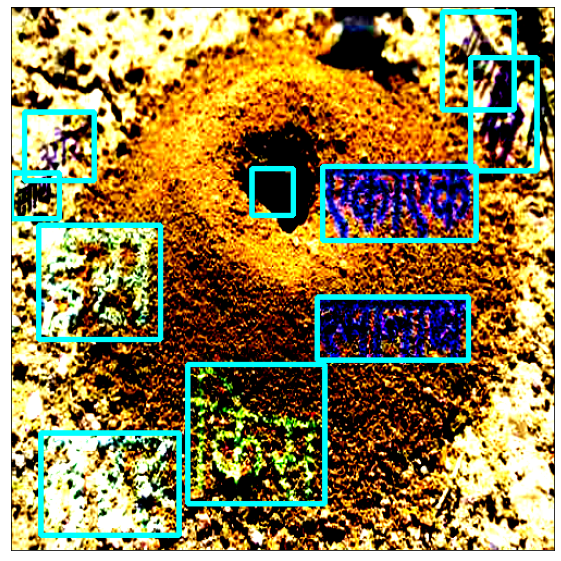

In [ ]:
obj = dataset[0]
object_detection_api(obj[0].numpy().transpose(1,2,0), obj[1]['boxes'])

# Training

In [ ]:
# for x_train,y_train in data_loader :
#     for i in range(4) :
#         temp_arr = y_train[i]['boxes']
#         # print(temp_arr)
#         for row in temp_arr :
#             for ele in row :
#                 if ele < 0 :
#                     print(ele)
#     # print('--------------------')

In [ ]:
# num_epochs = 5

# for epoch in range(num_epochs):
#     # train for one epoch, printing every 10 iterations
#     a = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=100)
#     print(a)
#     # update the learning rate
#     lr_scheduler.step()
#     # evaluate on the test dataset
#     evaluate(model, data_loader, device=device)

In [ ]:
# num_classes = 2
# model = get_object_detection_model(num_classes)
# model.to(device)
# params = [p for p in model.parameters() if p.requires_grad]
# optimizer = torch.optim.Adam(params, lr=0.1)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
# num_epochs = 5
# least_loss = 10000000
# name = 'Model - Trial 3'
# train_model = True


# if train_model :
#     flag = input('Train Model ??? ')

#     if flag.lower() == 'yes' :
#         for epoch in range(num_epochs):
#             _, loss1 = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=20, path_with_name='Models - CheckPoints/'+name, least_loss=least_loss)
#             if loss1 < least_loss :
#                 least_loss = loss1
#             lr_scheduler.step()
#             evaluate(model, data_loader, device=device)

#     else :
#         model = torch.load('Models - CheckPoints/'+name+'.pt',map_location=torch.device('cpu')) if not torch.cuda.is_available() else torch.load('Models - CheckPoints/'+name+'.pt')

# else :
#     model = torch.load('Models - CheckPoints/'+name+'.pt',map_location=torch.device('cpu')) if not torch.cuda.is_available() else torch.load('Models - CheckPoints/'+name+'.pt')

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_object_detection_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True) #.maskrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [ ]:
num_classes = 2

model = get_object_detection_model(num_classes)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.Adam(params, lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq, path_with_name=None, least_loss=10000000):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = 'Epoch: [{}]'.format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1. / 1000
        warmup_iters = min(1000, len(data_loader) - 1)
        lr_scheduler = utils.warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor)

    for images, targets in metric_logger.log_every(data_loader, print_freq, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())

        if path_with_name is not None :
            current_loss = losses.item()
            if current_loss < least_loss :
                least_loss = current_loss
                torch.save(model, path_with_name+'.pt')
                print('--------------------------------- Saving model with loss = ', current_loss, '---------------------------------')

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = utils.reduce_dict(loss_dict)
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())

        loss_value = losses_reduced.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses_reduced, **loss_dict_reduced)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

    return metric_logger, least_loss

In [ ]:
stop

In [ ]:
# if we want to train model, make sure that variable named -> 'train_model' <- is set to True (at the top) and corrosponding packages are imported.
# Some packages are shifted into folder named -> 'Object Detection Files' <- . Remove all those files and paste them into the main folder to import all packages


name = 'Object Detection Model - 3'

if train_model :
    num_epochs = 5
    least_loss = 10000000
    flag = input('Train Model ??? ')
    if flag.lower() == 'yes' :
        for epoch in range(num_epochs):
            _, loss1 = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=20, path_with_name='Models - CheckPoints/'+name, least_loss=least_loss)
            if loss1 < least_loss :
                least_loss = loss1
            lr_scheduler.step()
            evaluate(model, data_loader, device=device)
    else :
        model = torch.load('Models - CheckPoints/'+name+'.pt',map_location=torch.device('cpu')) if not torch.cuda.is_available() else torch.load('Models - CheckPoints/'+name+'.pt')

else :
    model = torch.load('Models - CheckPoints/'+name+'.pt',map_location=torch.device('cpu')) if not torch.cuda.is_available() else torch.load('Models - CheckPoints/'+name+'.pt')

Train Model ??? yes


/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


--------------------------------- Saving model with loss =  1.8749953508377075 ---------------------------------
Epoch: [0]  [  0/294]  eta: 0:27:04  lr: 0.000004  loss: 1.8750 (1.8750)  loss_classifier: 1.3204 (1.3204)  loss_box_reg: 0.1027 (0.1027)  loss_objectness: 0.4191 (0.4191)  loss_rpn_box_reg: 0.0328 (0.0328)  time: 5.5239  data: 1.3719  max mem: 10736
--------------------------------- Saving model with loss =  1.8618605136871338 ---------------------------------
--------------------------------- Saving model with loss =  1.6957802772521973 ---------------------------------
--------------------------------- Saving model with loss =  1.4704614877700806 ---------------------------------
--------------------------------- Saving model with loss =  1.1518751382827759 ---------------------------------
--------------------------------- Saving model with loss =  1.0049928426742554 ---------------------------------
--------------------------------- Saving model with loss =  0.752158105

In [ ]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

# Testing

In [ ]:
# import torchvision.transforms as Tr
# transform = transforms.Compose([
#                                 transforms.Resize((500,500)),
#                                 transforms.ToTensor(),
#                                 transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225)),
#                                 ])

# # def get_prediction(img, threshold, transform=transform):

# #     img = transform(img)
# #     model.eval()
# #     with torch.no_grad():
# #         pred = model([img.to(device)])

# #     pred_score = list(pred[0]['scores'].detach().cpu().numpy())
# #     pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]

# #     # pred_boxes = [[ (i[0]-(i[2]/2), i[1]-(i[3]/2)), (i[0]+(i[2]/2), i[1]+(i[3]/2)) ] for i in list(pred[0]['boxes'].detach().cpu().numpy())]
# #     pred_boxes = []
# #     for i in list(pred[0]['boxes'].detach().cpu().numpy()) :
# #         left = int(i[0] - (i[2]/2)) if i[0]-(i[2]/2)>0 else 0
# #         right = int(i[0] + (i[2]/2)) if i[0]+(i[2]/2)>0 else 0
# #         up = int(i[1] - (i[3]/2)) if i[1]-(i[3]/2)>0 else 0
# #         down = int(i[1] + (i[3]/2)) if i[1]+(i[3]/2)>0 else 0
# #         pred_boxes.append([(left,up),(right,down)])

# #     pred_boxes = pred_boxes[:pred_t+1]
# #     return pred_boxes

In [ ]:
# def object_detection_api(img, img_numpy, threshold=0.3, rect_th=3):
#     boxes = get_prediction(img, threshold)
#     # print(boxes)
#     img_numpy = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2RGB)
#     for i in range(len(boxes)):
#         # print(boxes[i][0], type(boxes[i][0]))
#         # print(boxes[i][1], type(boxes[i][1]))
#         # print(img.size)
#         cv2.rectangle(img_numpy, tuple(boxes[i][0]), tuple(boxes[i][1]), color=(0,255,255), thickness=rect_th)
#     plt.figure(figsize=(10,10))
#     plt.imshow(img_numpy)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

In [ ]:
transform = transforms.Compose([
                                transforms.Resize((500,500)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225)),
                                ])

def get_prediction(img, threshold, transform=transform):
    img = transform(img)
    model.eval()
    with torch.no_grad():
        pred = model([img.to(device)])
    pred_score = list(pred[0]['scores'].detach().cpu().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold]
    if len(pred_t) > 0 :
        pred_t = pred_t[-1]
    else : pred_t = -1
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().cpu().numpy())]
    pred_boxes = pred_boxes[:pred_t+1]
    return pred_boxes

In [ ]:
def object_detection_api(img, img_numpy, threshold=0.3, rect_th=3, text_size=0.7, text_th=2):
    boxes = get_prediction(img, threshold)
    img = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2RGB)
    shape1 = img.shape
    img = cv2.resize(img, (500, 500))
    for i in range(len(boxes)):
        cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0,255,255), thickness=rect_th)
    img = cv2.resize(img, (shape1[1],shape1[0]))
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

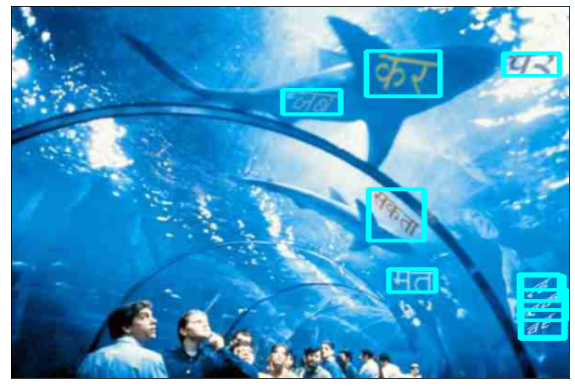

In [ ]:
img_pil = Image.open('Dataset/Synthetic Train Set (100k) - Detection & Recognition/Images/2/152.jpg')
object_detection_api(img_pil, np.array(img_pil)[:, :, ::-1].copy(), threshold=0.7)